# 查看Pipeline支持的任务类型

In [1]:
from transformers.pipelines import SUPPORTED_TASKS

d:\WorkSoft\anaconda3\envs\transformers\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pprint import pprint
pprint(SUPPORTED_TASKS.keys())

dict_keys(['audio-classification', 'automatic-speech-recognition', 'text-to-audio', 'feature-extraction', 'text-classification', 'token-classification', 'question-answering', 'table-question-answering', 'visual-question-answering', 'document-question-answering', 'fill-mask', 'summarization', 'translation', 'text2text-generation', 'text-generation', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-audio-classification', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-to-text', 'image-text-to-text', 'object-detection', 'zero-shot-object-detection', 'depth-estimation', 'video-classification', 'mask-generation', 'image-to-image', 'keypoint-matching'])


In [3]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '22aad52')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

# Pipeline的创建与使用方式

In [4]:
from transformers import pipeline, QuestionAnsweringPipeline

import os
os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'

## 根据任务类型直接创建Pipeline, 默认都是英文的模型

In [5]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [6]:
pipe(["very good!", "vary bad!"])

[{'label': 'POSITIVE', 'score': 0.9998525381088257},
 {'label': 'NEGATIVE', 'score': 0.9991207718849182}]

## 指定任务类型，再指定模型，创建基于指定模型的Pipeline

In [7]:
# https://huggingface.co/models
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

Device set to use cuda:0


In [8]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

## 预先加载模型，再创建Pipeline

In [9]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 这种方式，必须同时指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [10]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

In [11]:
pipe.model.device

device(type='cuda', index=0)

In [12]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


0.012193827629089356


## 使用GPU进行推理

In [13]:
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese", device=0)

Device set to use cuda:0


In [14]:
pipe.model.device

device(type='cuda', index=0)

In [15]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

0.009180443286895752


## 确定Pipeline参数

In [16]:
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Device set to use cuda:0


d:\WorkSoft\anaconda3\envs\transformers\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\TuDouXia\.cache\huggingface\hub\models--uer--roberta-base-chinese-extractive-qa. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [17]:
qa_pipe

In [18]:
QuestionAnsweringPipeline

transformers.pipelines.question_answering.QuestionAnsweringPipeline

In [19]:
qa_pipe(question="中国的首都是哪里？", context="中国的首都是北京", max_answer_len=2)

{'score': 0.7320812940597534, 'start': 6, 'end': 8, 'answer': '北京'}

# 其他Pipeline示例

In [23]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


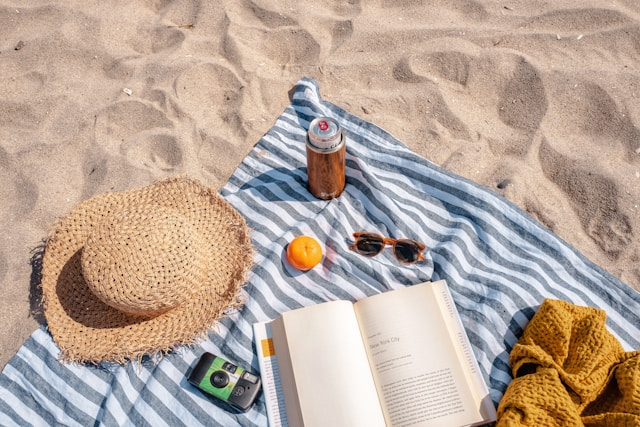

In [27]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
im = Image.open(requests.get(url, stream=True).raw)
im

In [28]:
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses"],
)
predictions

[{'score': 0.2589305341243744,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 430, 'ymax': 265}},
 {'score': 0.1123475655913353,
  'label': 'hat',
  'box': {'xmin': 39, 'ymin': 173, 'xmax': 260, 'ymax': 363}}]

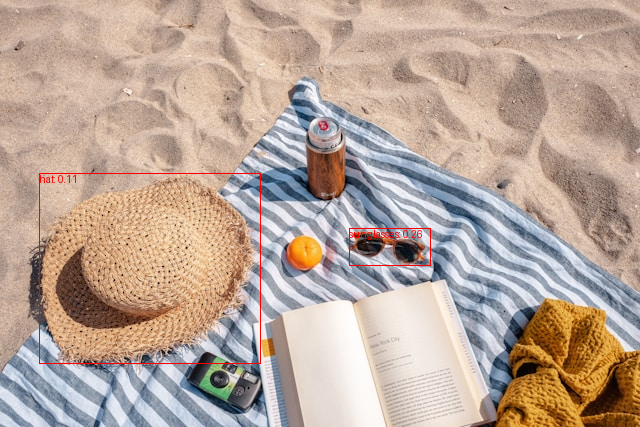

In [29]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im

# Pipeline背后的实现

In [30]:
from transformers import *
import torch

🚨 Config not found for parakeet. You can manually add it to HARDCODED_CONFIG_FOR_MODELS in utils/auto_docstring.py
🚨 Config not found for parakeet. You can manually add it to HARDCODED_CONFIG_FOR_MODELS in utils/auto_docstring.py
🚨 Config not found for parakeet. You can manually add it to HARDCODED_CONFIG_FOR_MODELS in utils/auto_docstring.py


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")

loading configuration file config.json from cache at C:\Users\TuDouXia\.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.57.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}



Attempting to create safetensors variant
Safetensors PR exists


In [32]:
input_text = "我觉得不太行！"
inputs = tokenizer(input_text, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 2769, 6230, 2533,  679, 1922, 6121, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [33]:
res = model(**inputs)
res

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7376, -1.8681]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [34]:
logits = res.logits
logits = torch.softmax(logits, dim=-1)
logits

tensor([[0.9736, 0.0264]], grad_fn=<SoftmaxBackward0>)

In [38]:
pred = torch.argmax(logits).item()
pred

0

In [36]:
model.config.id2label

{0: 'negative (stars 1, 2 and 3)', 1: 'positive (stars 4 and 5)'}

In [37]:
result = model.config.id2label.get(pred)
result

'negative (stars 1, 2 and 3)'